# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:140%;text-align:center;border-radius:10px 10px;">Netflix Appetency</p>

In [103]:
import pandas as pd
import numpy as np

#import my kaggle_utiles file that has all the custom funcitons i want.
# import sys
# sys.path.append("/home/pavithra/Pictures/learning/ML/kaggle/")
# sys.path
import kaggle_utils

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score


# Index
- 1. [Describtive analysis (Univariant Analysis)](#describtive-analysis)
    - 1.1 [Common Data](#common-data)
    - 1.2 [Numerical Data ](#numerical-data)
        - 1.2.1 [Descriptive analysis](#numerical-data)
        - 1.2.2 [Distribution Analysis](#distibution-analysis)
    - 1.3 [Categorical Data](#Categorical-data)
        - 1.3.2 [Unnique count](#Categorical-data)
        - 1.3.3 [Target Class balance check(only for classification)](#target-class-balance)
- 2. [Correlation Analysis (Bivariant Analysis)](#correlation-analysis)
- 3. [Data Preprocessing](#data-pre)
- 4. [Working with testing data](#test)
- 4. [Base modeling](#)


# Basic Analysis

In [104]:
pd.set_option('display.max_columns', None)

path = "data/train.csv"
data = pd.read_csv(path) 
test = pd.read_csv('data/test.csv', index_col=0)
display(data.head())

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [105]:
print("data number of samples---->",data.shape[0])
print("data number of columns---->",data.shape[1])

data number of samples----> 800
data number of columns----> 22


In [106]:
data.ID.unique # id is simply the index for this dataset . no further info can be taken from this . so making it as index for this datase.

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
795    796
796    797
797    798
798    799
799    800
Name: ID, Length: 800, dtype: int64>

In [107]:
data = pd.read_csv(path, index_col=0) # making id as index 
print("data number of samples---->",data.shape[0])
print("data number of columns---->",data.shape[1])
data.head()

data number of samples----> 800
data number of columns----> 21


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


## Column Summary
- ID - ID of the patient
- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
- age - Age of the patient in years
- gender - Gender of the patient
- ethnicity - Ethnicity of the patient
- jaundice - Whether the patient had jaundice at the time of birth
- autism - Whether an immediate family member has been diagnosed with autism
- contry_of_res - Country of residence of the patient
- used_app_before - Whether the patient has undergone a screening test before
- result - Score for AQ1-10 screening test
- age_desc - Age of the patient
- relation - Relation of patient who completed the test
- Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

<a id="describtive-analysis"></a>
# 1. Describtive analysis. (Univariant Analysis)

<a id="common-data"></a>
### 1.1 Common data Analysis (data type and missing values)

In [108]:
columns, categorical_col, numerical_col  = kaggle_utils.Common_data_analysis(data, missing_value_highlight_threshold=5.0)

======================================= Common data analysis =======================================

Numerical data list ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD'] ---> total 13 numerical values
Categorical data list ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation'] ---> total 8 categorical values



,data type,Missing Value(NA),?[]na null ' ',% of Missing value(NA),% of Missing value(?[]na null ' ')
A1_Score,int64,0,0,0.000000,0.000000
A2_Score,int64,0,0,0.000000,0.000000
A3_Score,int64,0,0,0.000000,0.000000
A4_Score,int64,0,0,0.000000,0.000000
A5_Score,int64,0,0,0.000000,0.000000
A6_Score,int64,0,0,0.000000,0.000000
A7_Score,int64,0,0,0.000000,0.000000
A8_Score,int64,0,0,0.000000,0.000000
A9_Score,int64,0,0,0.000000,0.000000
A10_Score,int64,0,0,0.000000,0.000000


## Observation
- Two features has missing values one with 10 %(relation) and another with 19%(ethnicity)
- Since we have very limited number of samples -- we can't delete any sample - need effective missing value handling method
- Since both caolumns having missing values are categorical column we can consider it as a separate category and that makes scense .

In [109]:
numerical_data = data[numerical_col]

<a id="numerical-data"></a>
### 1.2 Numerical Data Analysis

In [110]:
kaggle_utils.numerical_data_analysis(data[numerical_col], numerical_col)

===================================== Numerical data analysis ======================================
The skewness we are calculatinf here has a value range ===
If skew is == 0 -----------> Perfect normal distribution(green color)
If skew is > +1 -----------> Highly positive skew(red color)
If skew is > -1 -----------> Highly negative skew(red color)
If  0 > skew < 0.5 --------> Moderate positive skew(blue color)
If  0 < skew > -0.5 -------> Moderate negative skew(blue color)


,min,max,range(max-min),mean/average,standard deviation,Q1,meadian/Q2,Q3,Inter quantile range,kurtosis,Skewness
A1_Score,0.000000,1.000000,1.000000,0.582500,0.493455,0.000000,1.000000,1.000000,1.000000,-1.892368,-0.335215
A2_Score,0.000000,1.000000,1.000000,0.286250,0.452290,0.000000,0.000000,1.000000,1.000000,-1.104902,0.947558
A3_Score,0.000000,1.000000,1.000000,0.321250,0.467249,0.000000,0.000000,1.000000,1.000000,-1.415202,0.767035
A4_Score,0.000000,1.000000,1.000000,0.415000,0.493030,0.000000,0.000000,1.000000,1.000000,-1.885231,0.345671
A5_Score,0.000000,1.000000,1.000000,0.457500,0.498502,0.000000,0.000000,1.000000,1.000000,-1.975726,0.170938
A6_Score,0.000000,1.000000,1.000000,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,0.062120,1.435957
A7_Score,0.000000,1.000000,1.000000,0.273750,0.446161,0.000000,0.000000,1.000000,1.000000,-0.968648,1.016749
A8_Score,0.000000,1.000000,1.000000,0.717500,0.450497,0.000000,1.000000,1.000000,1.000000,-1.065607,-0.968021
A9_Score,0.000000,1.000000,1.000000,0.316250,0.465303,0.000000,0.000000,1.000000,1.000000,-1.376519,0.791788
A10_Score,0.000000,1.000000,1.000000,0.460000,0.498709,0.000000,0.000000,1.000000,1.000000,-1.979092,0.160816


### Note
First 5 related to describtive analysis of numerical data. Next 4 (q1,q2,q3,IQR) are for quantile analysis. <br>
Last 2 things fully related to the distrinution of the dataset. (The red once are highly skewed and the blue once are moderated --> no perfect normal distributed data here) <br> 

<a id="distibution-analysis"></a>
### 1.2.3 Distibution Analysis

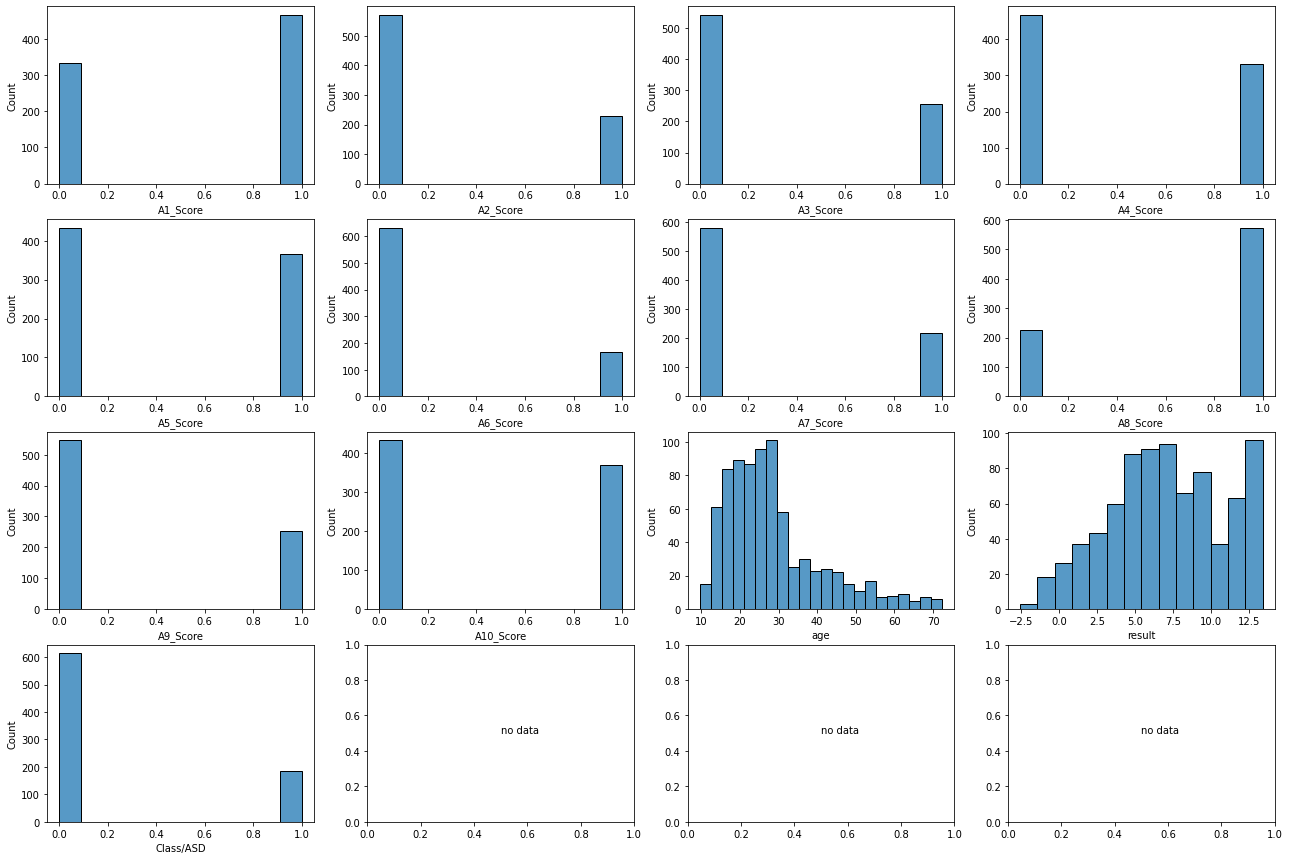

In [111]:
# find the distubution of the data. ( visualization would be so good)
column = numerical_col
plt.figure
fig, ax = plt.subplots(4,4 , figsize=(22,15))
# we have 9 numerical values.
col, row = 4,4
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(column):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.histplot(data=data, x=column[col_count], ax=ax[r,c])
        col_count +=1

### Observation
- Only age and result are the continuous values other values are decrete values with 0 - 1 range data.
- age - right skewed data - log transformation can be used
- result - seems normal distribution with very little left skew of -0.114338 - may be power transformation for better results.

<a id="Categorical-data"></a>
## 1.3 Categotical data

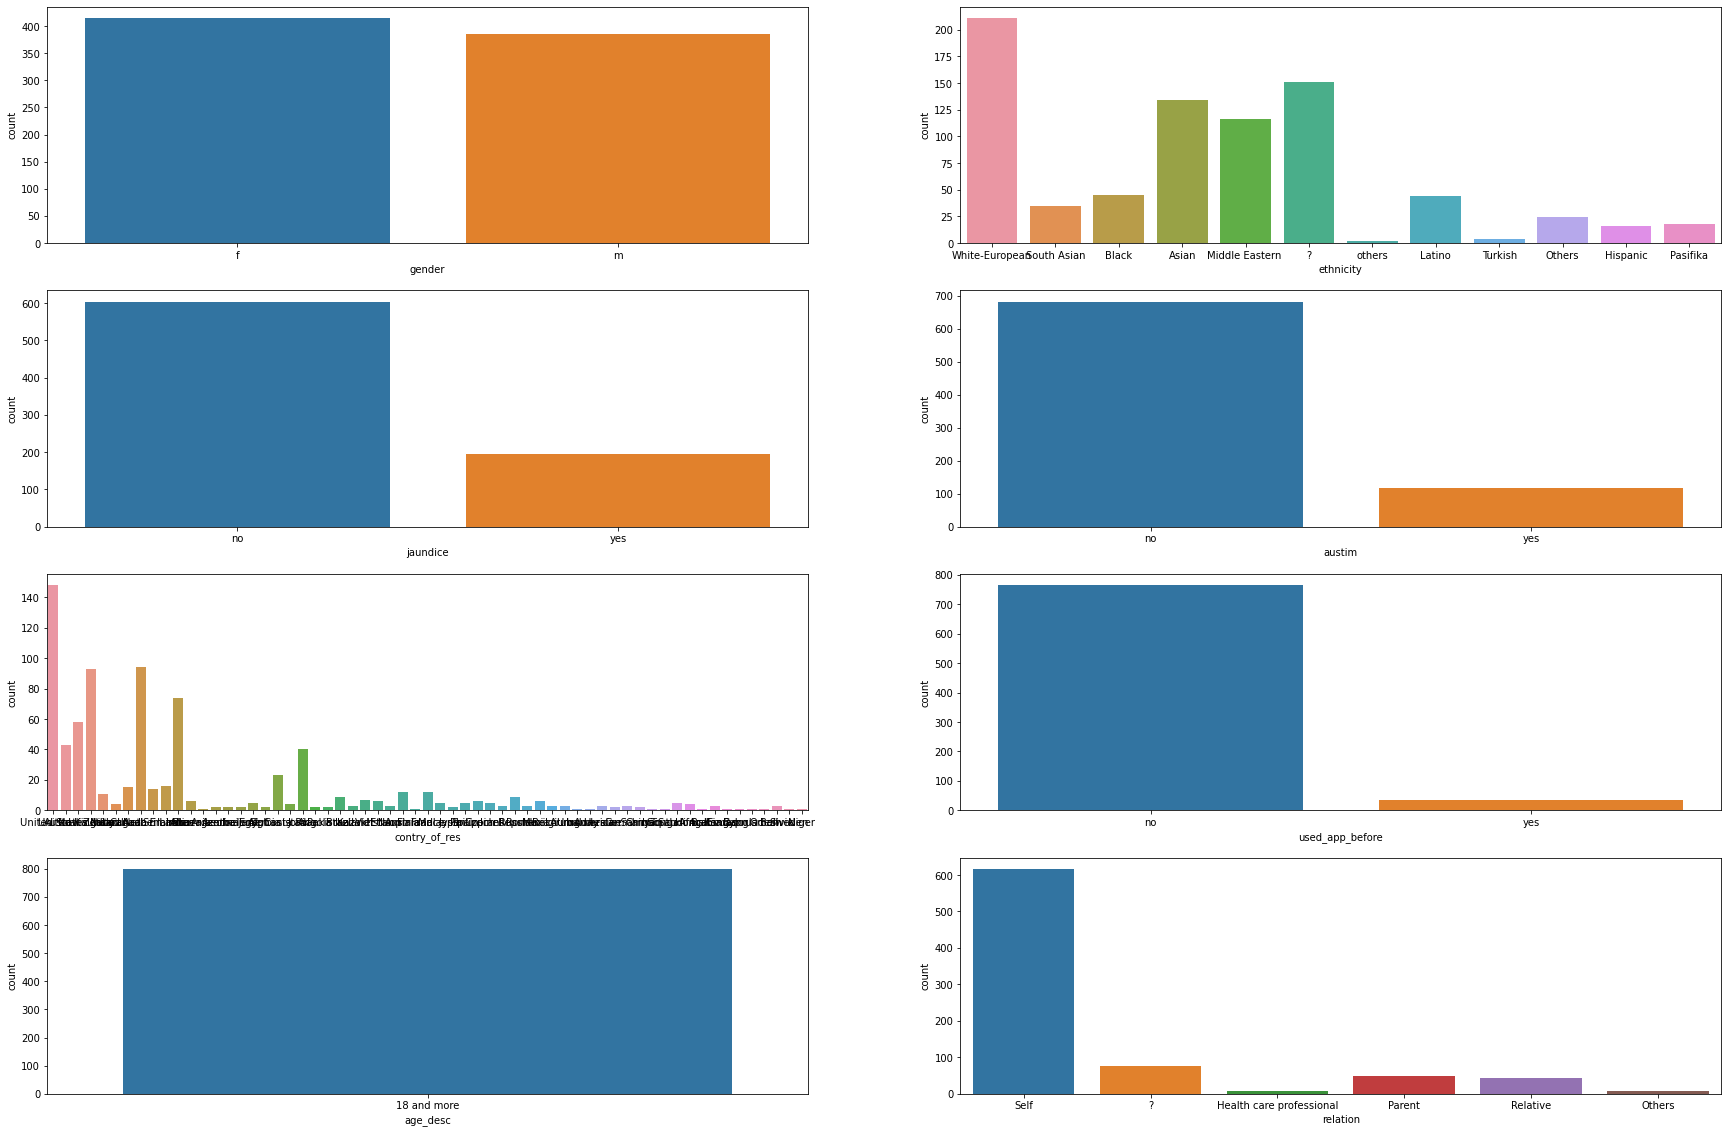

In [112]:

fig, ax = plt.subplots(4,2, figsize = (30,20))
col, row = 2,4
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(column):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.countplot(data=data, x=categorical_col[col_count], ax=ax[r,c])
        col_count +=1

### Observation
- ethnicity - has two same category with different spelling -- Others and others --> that shoul be merged 
- country_of_res - has lots of diffrent countries -- need to good technique to change this to numerical value.
- age_desc - has only one value -- so it can be removed.
- relation and age -  has '?' as a category -- may be we can consider it as a separate category.
- 50 % of positive austim people has 'jaundice'.

<a id="target-class-balance"></a>
## 1.3.3 Target class balace

no     683
yes    117
Name: austim, dtype: int64
percentage of first class --- > 0.85375
percentage of second class ---> 0.14625


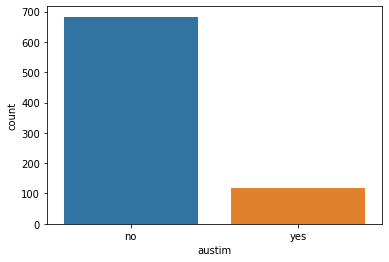

In [113]:
sns.countplot(data=data, x="austim")
count = data.austim.value_counts()
print(count)
print("percentage of first class --- >",count[0]/data.shape[0])
print("percentage of second class --->", count[1]/data.shape[0])

### Observation
- There is a large different in the 2 target classes -- need oversampling

<a id="correlation-analysis"></a>
# 2. Correlation Analysis

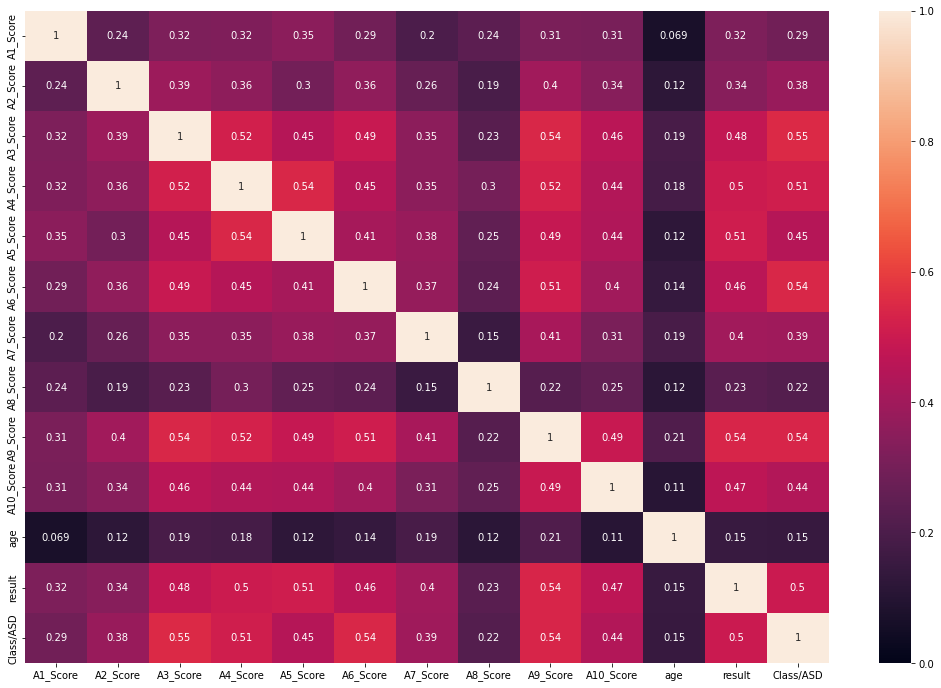

In [114]:
# can be done by heatmap.
fig = plt.figure(figsize = (18,12))
sns.heatmap(data=data.corr(), annot=True, vmin=0, vmax=1,)
plt.show()

## Actions Needed (data preprocing):
- Remove -- age_desc, contry_of_res(removing for now since it having lots of diff country name), used_app_before(not going to give any information about a patient having austim/not)
- Merge 'others' and 'Others' category in ethnicity
- label encoding for -- gender, austim, jaundice -- since they all have only two category -- yes/no and male/female
- Change '?' in ethnicity and relation to catetgory 'unknow'
- OneHot encoding for -- ethnicity and relation
- Oversampling -- after the base model to check the performance of this

<a id="data-pre"></a>
# Data preprocessing

In [115]:
# remove unwanted columns
data = data.drop(['age_desc', 'contry_of_res', 'used_app_before'], axis= 1)
data.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,7.819715,Self,0
2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,10.544296,?,0
3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,13.167506,Self,1


In [116]:
# Merge 'others' and 'Others' category in ethnicity
display(data['ethnicity'].value_counts())
data['ethnicity'] = data["ethnicity"].str.replace("Others", "others")
print("after replacing===========================")
display(data['ethnicity'].value_counts())

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

after replacing===========================


White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
others              26
Pasifika            18
Hispanic            16
Turkish              4
Name: ethnicity, dtype: int64

In [117]:
# label encoding of gender, austim, jaundice -- since they all have only two category -- yes/no and male/female
label_encode_columns = ['gender', 'austim', 'jaundice']
label_encod = LabelEncoder()
for col in label_encode_columns:
    data[col] = label_encod.fit_transform(data[col])
    test[col] = label_encod.transform(test[col])
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,0,White-European,0,0,7.819715,Self,0
2,0,0,0,0,0,0,0,0,0,1,13.829369,0,South Asian,0,0,10.544296,?,0
3,1,1,1,1,1,1,0,0,1,1,14.679893,0,White-European,0,0,13.167506,Self,1
4,0,0,0,1,0,0,0,0,0,0,61.035288,0,South Asian,0,0,1.530098,?,0
5,0,0,0,0,1,0,0,0,1,1,14.256686,1,Black,0,1,7.949723,Self,0


In [118]:
# Change '?' in ethnicity and relation to catetgory 'unknow'
data['ethnicity'] = data['ethnicity'].str.replace("?", "Unknow")
data['relation'] = data['relation'].str.replace("?", "Unknow")
data.head()

/tmp/ipykernel_6959/3855369656.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['ethnicity'] = data['ethnicity'].str.replace("?", "Unknow")
/tmp/ipykernel_6959/3855369656.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['relation'] = data['relation'].str.replace("?", "Unknow")


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,0,White-European,0,0,7.819715,Self,0
2,0,0,0,0,0,0,0,0,0,1,13.829369,0,South Asian,0,0,10.544296,Unknow,0
3,1,1,1,1,1,1,0,0,1,1,14.679893,0,White-European,0,0,13.167506,Self,1
4,0,0,0,1,0,0,0,0,0,0,61.035288,0,South Asian,0,0,1.530098,Unknow,0
5,0,0,0,0,1,0,0,0,1,1,14.256686,1,Black,0,1,7.949723,Self,0


In [119]:
# OneHot encoding for -- ethnicity and relation
data = pd.get_dummies(data)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,Class/ASD,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_Unknow,ethnicity_White-European,ethnicity_others,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_Unknow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,7.819715,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,10.544296,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,13.167506,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,1.530098,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,7.949723,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [120]:
print("Shape of the training data --- >", data.shape)

Shape of the training data --- > (800, 33)


<a id="test"></a>
# Working on testing data.

In [121]:
# load the test data.


test = test.drop(['age_desc', 'contry_of_res', 'used_app_before'], axis= 1)
test['ethnicity'] = test["ethnicity"].str.replace("Others", "others")

# label encoding
# label_encode_columns = ['gender', 'austim', 'jaundice']
# for col in label_encode_columns:
#     test[col] = label_encod.transform(test[col])

# change values
test['ethnicity'] = test['ethnicity'].str.replace("?", "Unknow")
test['relation'] = test['relation'].str.replace("?", "Unknow")


# one hot encoding
test = pd.get_dummies(test)

/tmp/ipykernel_6959/2927394033.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  test['ethnicity'] = test['ethnicity'].str.replace("?", "Unknow")
/tmp/ipykernel_6959/2927394033.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  test['relation'] = test['relation'].str.replace("?", "Unknow")


In [122]:
test.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_Unknow,ethnicity_White-European,ethnicity_others,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_Unknow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,13.445319,1,0,0,-0.914467,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,25.057229,0,1,0,4.553447,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,1,0,1,0,1,0,0,28.799885,0,0,0,-1.581115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,1,0,1,0,1,1,16.501526,0,1,0,11.779210,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,1,1,0,0,1,1,0,54.223869,0,0,0,10.717321,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [123]:
print("Shape of the test data --- >", test.shape)

Shape of the test data --- > (200, 32)


## Data is ready for modeling... :)

In [124]:
# split the data

y = data.loc[:, "Class/ASD"]
X = data.drop("Class/ASD", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Shape of the X_train --->", X_train.shape)
print("Shape of the y_train --->", y_train.shape)
print("Shape of the X_test - -->", X_test.shape)
print("Shape of the y_test -- ->", y_test.shape)

Shape of the X_train ---> (640, 32)
Shape of the y_train ---> (640,)
Shape of the X_test - --> (160, 32)
Shape of the y_test -- -> (160,)


In [125]:
def metrics(y_test, y_pred):
    print("{:=^100}".format(" Prediction Evaluation "))
    f1Score = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recal = round(recall_score(y_test, y_pred), 4)
    acc = round(accuracy_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred), 4)

    print("{}\t\t{}\t\t{}\t\t{}\t\t{}\t\t".format("Accuracy", "Recall", "Precision", "F1-Score", "AUC-ROC"))
    print("{}\t\t\t{}\t\t{}\t\t\t{}\t\t\t{}\t\t".format(acc, recal, precision, f1Score, auc))


<a id="base-model"></a>
# Base Modeling

In [126]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

metrics(y_test, y_pred)

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7353		0.7143			0.7246			0.828		


/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Parameter tuning 

### Tunable parameters in Logestic regression
Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.

C in [100, 10, 1.0, 0.1, 0.01]

In [133]:
# Tuning C
for c in [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]:
    log_reg = LogisticRegression(C= c)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)

    metrics(y_test, y_pred)

/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7353		0.7143			0.7246			0.828		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8875			0.7353		0.7353			0.7353			0.8319		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7353		0.7143			0.7246			0.828		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7353		0.7143			0.7246			0.828		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7647		0.7027			0.7324			0.8387		
=================================

/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
# tuning solver
for sol in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
    log_reg = LogisticRegression(solver=sol)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)

    metrics(y_test, y_pred)

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8875			0.7647		0.7222			0.7429			0.8427		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8812			0.7353		0.7143			0.7246			0.828		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8938			0.7647		0.7429			0.7536			0.8466		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.8688			0.7353		0.6757			0.7042			0.82		
====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.875			0.7353		0.6944			0.7143			0.824		


/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [141]:
# tuning regularization
#for regularization in ["none", "l1", "l2", "elasticnet"]:
log_reg = LogisticRegression(solver= "saga", penalty='l1', l1_ratio=1)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

metrics(y_test, y_pred)

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.875			0.7353		0.6944			0.7143			0.824		


/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [144]:
log_reg = LogisticRegression(solver= "saga", penalty='l2', l1_ratio=1)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.875			0.7353		0.6944			0.7143			0.824		


/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [148]:
log_reg = LogisticRegression(solver= "saga", penalty='elasticnet', l1_ratio=0.8, C=10)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

metrics(y_test, y_pred)

====================================== Prediction Evaluation =======================================
Accuracy		Recall		Precision		F1-Score		AUC-ROC		
0.875			0.7353		0.6944			0.7143			0.824		


/home/pavithra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Submission

In [127]:
sub = pd.read_csv("data/sample_submission.csv")
sub.head()

,ID,Class/ASD
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [130]:

y_pred = log_reg.predict(test)
sub['Class/ASD'] = y_pred
sub.to_csv('submission.csv', index=False)

In [131]:
sub.head()

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
